# Importing data + EDA

Importing necessary libaries and dataset for the section

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import math

#Create a scrollable window so dataframe will not overflow the screen
#Taken from https://www.youtube.com/watch?v=NQQ3DRdXAXE&list=PL1CS4FDP5q9n5UM0qH_2XgsjH-8a6TK06&index=66
def scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [3]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [5]:
html_train = scrollable_table(df_train, "training_df", "Train")
HTML(html_train)

In [7]:
print(f"Train dataset has {df_train.shape[1]} columns and {df_train.shape[0]} rows.")
print(f"Test dataset has {df_test.shape[1]} columns and {df_test.shape[0]} rows.")

Train dataset has 81 columns and 1460 rows.
Test dataset has 80 columns and 1459 rows.


In [9]:
print(f"There are {len(set(df_train.dtypes))} unique data type in the df which are {set(df_train.dtypes)}.")

There are 3 unique data type in the df which are {dtype('O'), dtype('int64'), dtype('float64')}.


In [4]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64'])
categorical_features = df_train.select_dtypes(include=['O'])

Below is one way that you can make quick visualization with seaborn, in which you can roughly understand the general distribution of all features to make further and deeper analysis. I found it as a very useful step to do before any deeper analysis especially when you got a huge amount of features like this one.

I basically did regplot for numerical features instead of scatterplot for some additional information (correlation with saleprice) and boxplot for categorical features, which you can change based on your preferences.

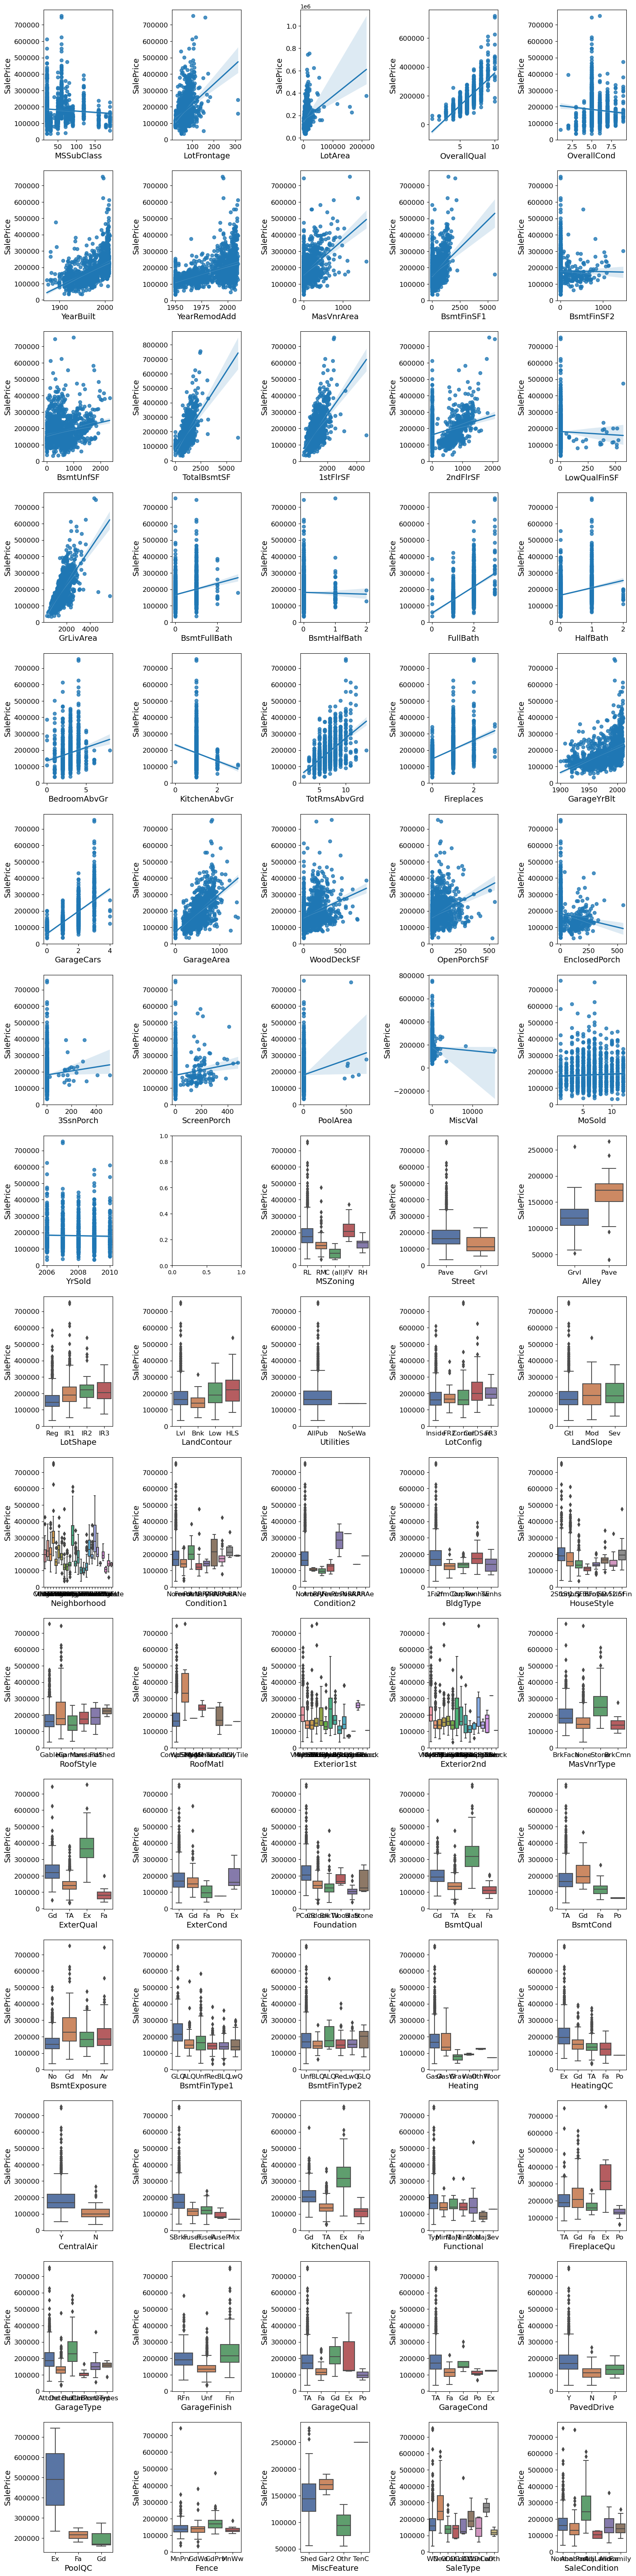

In [16]:
#cluster same datatype together so it will be visually better
train_dtcluster = numerical_features.join(categorical_features) 

#The function take in 3 arguments, your dataset, the target column (SalePrice in this case)
#And the number of columns it takes which has a default value of 4
def plot_all(df, target_col, num_cols=4):
    num_rows = math.ceil(len(df.columns)/num_cols)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))
    sns.set(font_scale=1.2, style='whitegrid')
    for i, col_name in enumerate(df.columns):
        if col_name != target_col.name:
            ax = axes[i // num_cols, i % num_cols]
            if df[col_name].dtype == "O":
                sns.boxplot(x=df[col_name], y=target_col, ax=ax) #Categorical plot
            else:
                sns.regplot(x=df[col_name], y=target_col, ax=ax) #Numerical plot
            ax.set_xlabel(col_name, fontsize=14)
            ax.set_ylabel(target_col.name, fontsize=14)
            ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

plot_all(train_dtcluster.drop('Id',axis=1), df_train.SalePrice, num_cols=5)

The above plots effectively gave us some insights to the correlation between different features and the target sale price. For example, we can potentially drop some seemingly useless features like Utilities, PoolArea and MiscVal by eyes for better training efficiency and outcome. 

Also, based on the regplots, we can clearly identify some of the 'numerical_features' should be labelled as categorical features which is what we will be doing next.

In [5]:
df_train[['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
          'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']]= df_train[['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
          'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']].astype(str)

/tmp/ipykernel_32/1376617749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


<Axes: >

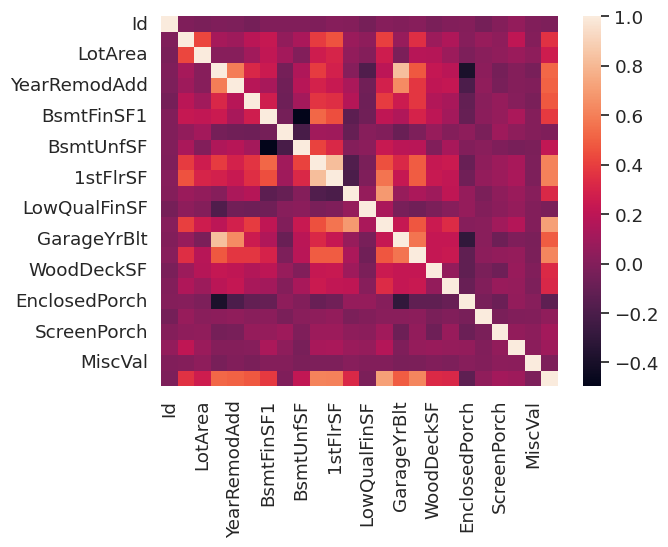

In [28]:
sns.heatmap(df_train.corr())

Text(0.5, 1.0, 'Distribution of SalePrice')

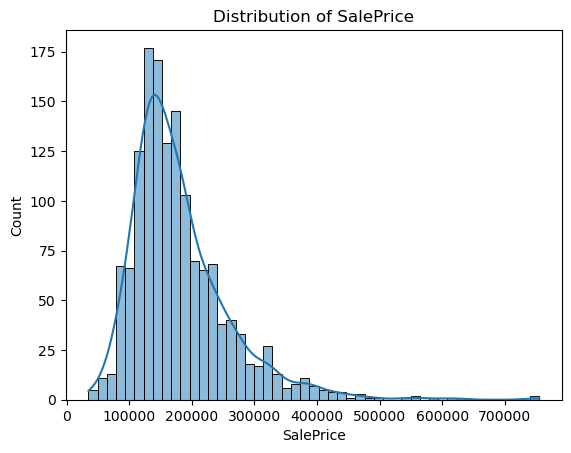

In [15]:
sns.histplot(df_train.SalePrice, kde=True)
plt.title("Distribution of SalePrice")

The histplot suggest a positive skew of our target distribution which suggests that we could apply log transformation to our target variable. By applying log transformation we can reduce the skewness and make the distribution more normal which can significantly improve the performances of many ML algorithms that suggest a normal distribution. But remember to take exp on the final prediction to get the correct results at the end.

In [44]:
df_train['SalePrice'] = np.log(df_train.SalePrice)
y_train = df_train['SalePrice']

Text(0.5, 1.0, 'Normalized SalePrice Distribution')

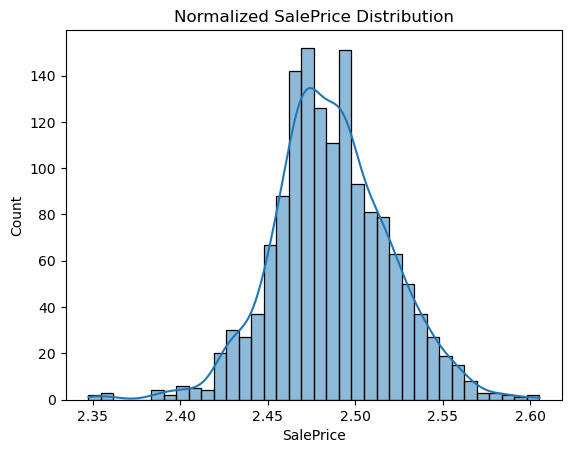

In [45]:
sns.histplot(df_train.SalePrice, kde=True)
plt.title("Normalized SalePrice Distribution")

In [29]:
(df_train.isna().sum().values / df_train.shape[0]) * 100

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.77397260e+01,
       0.00000000e+00, 0.00000000e+00, 9.37671233e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.47945205e-01, 5.47945205e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.53424658e+00, 2.53424658e+00,
       2.60273973e+00, 2.53424658e+00, 0.00000000e+00, 2.60273973e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.84931507e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [34]:
nan_df = pd.DataFrame({"missing_count": df_train.isna().sum().values, 
                       "dtype": df_train.dtypes.values,
                       "Percentage of missing values": (df_train.isna().sum().values / df_train.shape[0]) * 100},
              index=df_train.columns)
html_nandf = scrollable_table(nan_df.sort_values(by="missing_count", ascending=False), "nan",
                             "Count of missing values in each features")
HTML(html_nandf)

As we can see, PoolQC, MiscFeature, Alley and Fence all have a high percentage of missing values which I will be dropping them in this case.

In [35]:
df_train = df_train.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1)

For the remaining columns that have missing values, I will be using SimpleImputer from sklearn to impute mean for numerical features and constant 'missing' value for categorical variables which make more sense this case since missing values for categorical features may be a sign that that particular house does not have that particular feature, eg. the house does not have a garage.

One other observation we got from the plot_all function and just based on the feature descriptions themselves is that there are quite a number of similar features in the dataset which could most likely result in **multicollinearity** (high correlation between two or more predictor variables). This will cause huge problem especailly for algorithms such as linear regression. 

There are multiple appraoch in reducing the problem of multicollinearity, such as manually dropping features, L1L2 Regularization and PCA which is what I will be doing in this notebook as part of the pipeline.

# Pipeline

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv").drop("Id",axis=1)


In [92]:
class imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer_num = SimpleImputer(strategy='mean')
        imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
        for col in X.columns:
            if X[col].dtype == 'O':
                X[col] = imputer_cat.fit_transform(X[col].values.reshape(-1,1))[:,0] 
            else:
                X[col] = imputer_num.fit_transform(X[col].values.reshape(-1,1))[:,0] 
        return X

# class categorical_transformation(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         transfer_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
#                         'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
#                         'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
#                         'MoSold', 'YrSold']
#         for i in transfer_col:
#             X[i] = X[i].astype(str)
#         return X

class log_skewedfeatures(BaseEstimator, TransformerMixin): #apply to numerical features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        skewness = X.apply(lambda x: skew(x))
        skewness = skewness[abs(skewness) > 0.5]
        skewed_features = skewness.index
        X[skewed_features] = np.log1p(X[skewed_features])
        return X
    
class PCA_transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        pca = PCA()
        pca = PCA(n_components=107) #retain 95% variance
        X_pca = pca.fit_transform(X)
        return X_pca

In [93]:
#Transfer the columns to categorical data
transfer_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                'MoSold', 'YrSold']
for i in transfer_col:
    train[i] = train[i].astype(str)

train = train[train.GrLivArea < 4000] #remove outliners

X = train.drop(["SalePrice", "PoolQC", "MiscFeature", "Alley", "Fence"] ,axis=1)
y = np.log(train.SalePrice)

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', imputer()),
    ('log_feature', log_skewedfeatures()),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', imputer()),
    ('onehotencode', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA_transformer())])

X_preprocessed = pipeline.fit_transform(X)

In [10]:
HTML(scrollable_table(pd.DataFrame(data=X_preprocessed), 'X_preprocessed', 'Pipeline transformed dataframe'))

# Modelling

In [23]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, 
                                                    test_size=0.2, random_state=42)

def rmse_cv(model):
    cv_score = cross_val_score(model, X_preprocessed, y, cv=5, 
                               scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_score).mean()
    return rmse

First start off with models with no parameters at all, we will be doing hyperparameter tuning with GridSearchCV in next section

In [45]:
models_raw = {
    'LinearRegression': LinearRegression(),
    'Ridge': RidgeCV(),
    'Lasso': LassoCV(alphas=np.logspace(-4,4,9)),
    'ElasticNet': ElasticNetCV(),
    'XGBoost': XGBRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}


for name, model in models_raw.items():
    print(f"{name} RMSE: {rmse_cv(model)}")

LinearRegression RMSE: 0.12515303203274109
Ridge RMSE: 0.12441406485840512
Lasso RMSE: 0.12556239240786624
ElasticNet RMSE: 0.12567313696465948
XGBoost RMSE: 0.15856116840713314
RandomForest RMSE: 0.153924095408013
SVR RMSE: 0.14592788516894772


Linear regressors appear to have the best performances at this point, but this may be largely due to the fact that other more complex models like XGBoost usually will give a much better performance after hyperparameter tuning.

# Hyperparameter Tuning

Noted that I comment the whole script out since it will take a very long time to train the models which I would include the results as comment at the bottom if you are interested.

In [48]:
param_grids = {
    'LinearRegression': {},
    'Ridge': {
        'fit_intercept': [True, False],
        'alphas': [[0.1, 1.0, 10.0], [0.01, 0.1, 1.0], [0.001, 0.01, 0.1]]
    },
    'Lasso': {
        'fit_intercept': [True, False],
        'max_iter': [1000, 5000, 10000],
    },
    'ElasticNet': {
        'fit_intercept': [True, False],
        'max_iter': [1000, 5000, 10000],
        'l1_ratio': [0.1, 0.5, 0.9],
        'alphas': [[0.1, 1.0, 10.0], [0.01, 0.1, 1.0], [0.001, 0.01, 0.1]]
    },
    'XGBoost': {
        'n_estimators': [500, 1000],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 8],
        'reg_alpha': [0.0, 0.2],
        'reg_lambda': [0.0, 0.2],
        'min_child_weight': [1, 3, 5],
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'gamma': ['scale', 'auto'],
    }
    
}

In [49]:
from sklearn.model_selection import GridSearchCV

grids = {}
cv = 3

for model_name, model in models_raw.items():
    
    grids[model_name] = GridSearchCV(estimator=model, 
                                     param_grid=param_grids[model_name], 
                                     cv=cv, 
                                     scoring='neg_mean_squared_error', 
                                     n_jobs=-1)
    grids[model_name].fit(X_preprocessed, y)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')
    
"""
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1260966678727567

Best parameters for Ridge: {'alphas': [0.1, 1.0, 10.0], 'fit_intercept': True}
Best RMSE for Ridge: 0.12528363423827402

Best parameters for Lasso: {'fit_intercept': True, 'max_iter': 1000}
Best RMSE for Lasso: 0.12640331493267964

Best parameters for ElasticNet: {'alphas': [0.001, 0.01, 0.1], 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000}
Best RMSE for ElasticNet: 0.12589859944390955

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.2}
Best RMSE for XGBoost: 0.1439326581470281

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for RandomForest: 0.15603293970866067

Best parameters for SVR: {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE for SVR: 0.1243232926606125"""

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1260966678727567

Best parameters for Ridge: {'alphas': [0.1, 1.0, 10.0], 'fit_intercept': True}
Best RMSE for Ridge: 0.12528363423827402

Best parameters for Lasso: {'fit_intercept': True, 'max_iter': 1000, 'precompute': True}
Best RMSE for Lasso: 0.12640331493267964

Best parameters for ElasticNet: {'alphas': [0.001, 0.01, 0.1], 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'precompute': True}
Best RMSE for ElasticNet: 0.12589859944390955

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.2}
Best RMSE for XGBoost: 0.1439326581470281

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for RandomForest: 0.15603293970866067

Best parameters for SVR: {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE for 

Based on these results, we will run a 2nd round of hyperparameter tuning to deal with edge cases, it's basically the same script with different param_grids.

In [50]:
param_grids = {
    'LinearRegression': {},
    'Ridge': {
        'fit_intercept': [True],
        'alphas': [[0.1, 1.0, 10.0]]
    },
    'Lasso': {
        'fit_intercept': [True],
        'max_iter': [500, 800, 1000],
    },
    'ElasticNet': {
        'fit_intercept': [True],
        'max_iter': [500, 800, 1000],
        'l1_ratio': [0.01, 0.05, 0.1],
        'alphas': [[0.001, 0.01, 0.1]]
    },
    'XGBoost': {
        'n_estimators': [1000],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'reg_alpha': [0.0],
        'reg_lambda': [0.1, 0.2, 0.5],
        'min_child_weight': [5, 8, 10],
    },
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [4, 6, 8],
    },
    'SVR': {
        'kernel': ['linear'],
        'C': [0.05, 0.1, 0.5],
        'epsilon': [0.01, 0.05],
        'gamma': ['scale']
    }
    
}

grids = {}
cv = 3

for model_name, model in models_raw.items():
    
    grids[model_name] = GridSearchCV(estimator=model, 
                                     param_grid=param_grids[model_name], 
                                     cv=cv, 
                                     scoring='neg_mean_squared_error', 
                                     n_jobs=-1)
    grids[model_name].fit(X_preprocessed, y)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')
    
"""
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1260966678727567

Best parameters for Ridge: {'alphas': [0.1, 1.0, 10.0], 'fit_intercept': True}
Best RMSE for Ridge: 0.12528363423827402

Best parameters for Lasso: {'fit_intercept': True, 'max_iter': 500, 'precompute': True}
Best RMSE for Lasso: 0.12640331493267964

Best parameters for ElasticNet: {'alphas': [0.001, 0.01, 0.1], 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 500, 'precompute': True}
Best RMSE for ElasticNet: 0.12532307173653465

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.1}
Best RMSE for XGBoost: 0.14190498624093364

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for RandomForest: 0.1571354640144412

Best parameters for SVR: {'C': 0.05, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE for SVR: 0.12421321345089785
"""

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1260966678727567

Best parameters for Ridge: {'alphas': [0.1, 1.0, 10.0], 'fit_intercept': True}
Best RMSE for Ridge: 0.12528363423827402

Best parameters for Lasso: {'fit_intercept': True, 'max_iter': 500, 'precompute': True}
Best RMSE for Lasso: 0.12640331493267964

Best parameters for ElasticNet: {'alphas': [0.001, 0.01, 0.1], 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 500, 'precompute': True}
Best RMSE for ElasticNet: 0.12532307173653465

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.1}
Best RMSE for XGBoost: 0.14190498624093364

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for RandomForest: 0.1571354640144412

Best parameters for SVR: {'C': 0.05, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE fo

In [51]:
LinearRegression = LinearRegression()
Ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], fit_intercept=True)
Lasso = LassoCV(alphas=np.logspace(-4,4,9), fit_intercept=True, max_iter=500)
ElasticNet = ElasticNetCV(alphas=[0.001, 0.01, 0.1], fit_intercept=True, l1_ratio=0.01, max_iter=500)
XGBoost = XGBRegressor(learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=1000, reg_lambda=0.1)
RandomForest = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1000)
SVR = SVR(C=0.05, epsilon=0.01, gamma='scale', kernel='linear')

In [73]:
base_models = {
    'LinearRegression': LinearRegression,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'ElasticNet': ElasticNet,
    'XGBoost': XGBoost,
    'RandomForest': RandomForest,
    'SVR': SVR,
}

for model_name, model in base_models.items():
    model.fit(X_train, y_train)
    model_cvscore = np.sqrt(-cross_val_score(model, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')).mean()
    print(f"{model_name} score: {model_cvscore}")

LinearRegression score: 0.12515303203274109
Ridge score: 0.12441406485840512
Lasso score: 0.12556239240786624
ElasticNet score: 0.12433216571640923
XGBoost score: 0.13775621043881608
RandomForest score: 0.15263609563973296
SVR score: 0.12467145312585651


# Model Ensembling

This section will be ensembling the above models together, using stacking and voting.

Ensembling is a very powerful technique in machine learning in which we use it to combine the performance of different models together to get a more robust outcome which usually give a better performance in general.

## Voting

In [63]:
from sklearn.ensemble import VotingRegressor

# Create a voting classifier
voting_model = VotingRegressor(estimators=[('lr', LinearRegression), 
                                          ('L1', Ridge), 
                                          ('L2', Lasso),
                                          ('EN', ElasticNet),
                                          ('xgb', XGBoost),
                                          ('rf', RandomForest),
                                          ('svr', SVR)])

voting_model.fit(X_train, y_train)
rmse_voting = np.sqrt(-cross_val_score(voting_model, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')).mean()
print(f"VotingRegressor RMSE: {rmse_voting}")
#RMSE: 0.12282351929636004

VotingRegressor RMSE: 0.12282351929636004


In [62]:
voting_model2 = VotingRegressor(estimators=[('lr', LinearRegression), 
                                          ('L1', Ridge), 
                                          ('L2', Lasso),
                                          ('EN', ElasticNet),
                                          ('svr', SVR)])

voting_model2.fit(X_train, y_train)
rmse_voting2 = np.sqrt(-cross_val_score(voting_model2, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')).mean()
print(f"VotingRegressor2 RMSE: {rmse_voting2}")
#RMSE: 0.12404542705427031

VotingRegressor2 RMSE: 0.12404542705427031


## Stacking

In [64]:
from sklearn.ensemble import StackingRegressor

base_regressors = [('lr', LinearRegression), 
                   ('L1', Ridge), 
                   ('L2', Lasso),
                   ('EN', ElasticNet),
                   ('xgb', XGBoost),
                   ('rf', RandomForest),
                   ('svr', SVR)]


ensemble = StackingRegressor(
    estimators=base_regressors,
    final_estimator=SVR
)
ensemble.fit(X_train,y_train)

scores = cross_val_score(
    ensemble, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error'
)

print("Mean score:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

# #Mean score: 0.12317284977283105
# #Standard deviation: 0.0031937144849837834

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9048671001019901, tolerance: 0.012373864323242435
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8451894810202667, tolerance: 0.012245931136848527
  model = cd_fast.enet_coordinate_descent_gram(


Mean score: 0.12317284977283105
Standard deviation: 0.0031937144849837834


# Submission

Now we are going to make our submissions, I will be submitting all the baseline models with the three ensembled model to see what's the difference between them. Now, we will pass our test dataframe through our pipeline and make our predictions which you can see one of the reasons why we use pipeline is that we can easily reuse it in the future when we want to pass it through test set, or make modifications to the pipeline as well, making everything more convenient.

In [94]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_id = test.Id.values

In [95]:
transfer_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                'MoSold', 'YrSold']
for i in transfer_col:
    test[i] = test[i].astype(str)

X_sub = test.drop(["PoolQC", "MiscFeature", "Alley", "Fence"] ,axis=1)
X_sub_preprocessed = pipeline.fit_transform(X_sub)

In [102]:
final_models = {
    'LinearRegression': LinearRegression,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'ElasticNet': ElasticNet,
    'XGBoost': XGBoost,
    'RandomForest': RandomForest,
    'SVR': SVR,
    'Voting1': voting_model,
    'Voting2': voting_model2,
    'Stack': ensemble
}
for model_name, model in final_models.items():
    submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': model.predict(X_sub_preprocessed)})
    submission_name = 'submission_' + model_name + '.csv'
    submission_df.to_csv(submission_name, index=False)